## Spatial exercise wednesday

So, now I have a better hypothesis; mental health has something to do with noise!

Here, you find a new geo-dataset;

- OPEN_DATA_STOEJDATA_VIEWPoint.shp

This contains information about noise at different places within municipalities. The end goal is to create a map where each point is aggregated to municipality level and we visualize where the noise is more severe. We use the column "GNSHAST071" to measure average noice at that point.

When that map is done, create a pretty map with the mental health measurement and compare the two - are there any connection between noise at an aggregated level and mental health?

Feel free to play around with types of basemaps, types of colors and all sorts of things - the goal is not to become the leading expert in making fancy maps but to have fun and learn stuff.

In [1]:
# Loading required packages
import geopandas as gdp
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Proj
#import contextily as ctx

In [2]:
# Load the data
stoejdata = gdp.read_file("shapefiles_exercise//OPEN_DATA_STOEJDATA_VIEWPoint.shp")

In [4]:
# Load the municipaldata
municipalities = gdp.read_file("Day 3/Shapefiles/KOMMUNE.shp")
mun = municipalities.dissolve(by='KOMNAVN')

In [7]:
#Load the data on phsyciatric hospitalizations
mun_hosp=pd.read_excel("https://github.com/CALDISS-AAU/sdsphd20/raw/master/datasets/spatialdata.xlsx")


In [8]:
# Create dataset of psychiatric hospitalizations
mun_psych = mun.merge(mun_hosp, left_on='KOMNAVN', right_on="omr", how='left', validate="one_to_one")


In [11]:
#set all datasets to same coordinate system
mun_psych = mun_psych.to_crs(epsg=3857)
stoejdata=stoejdata.to_crs(epsg=3857)

<AxesSubplot:>

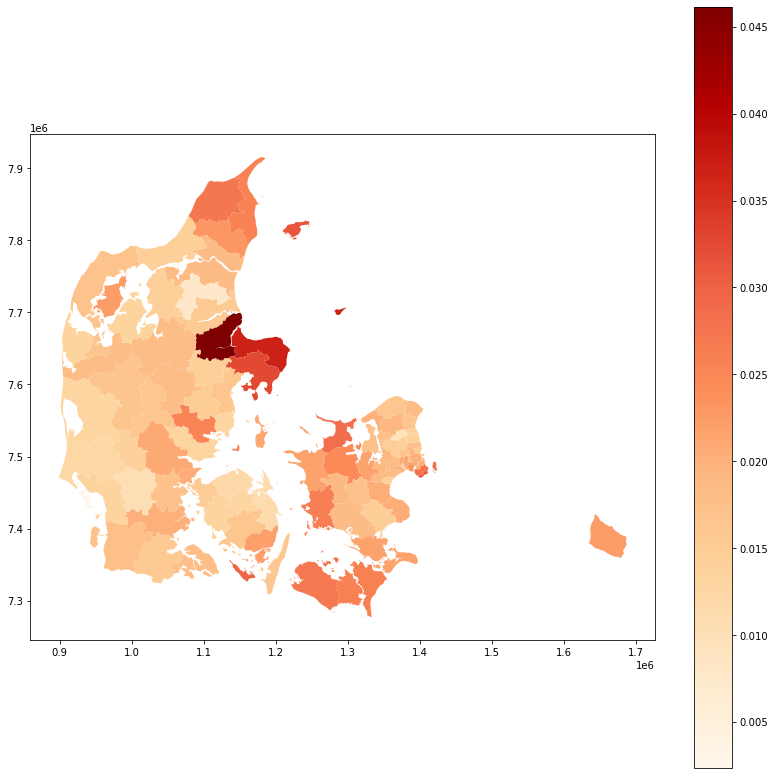

In [12]:
## Double check for pscyh:
mun_psych.plot(column="psykratio", legend="True", figsize=(14,14), cmap='OrRd')

<AxesSubplot:>

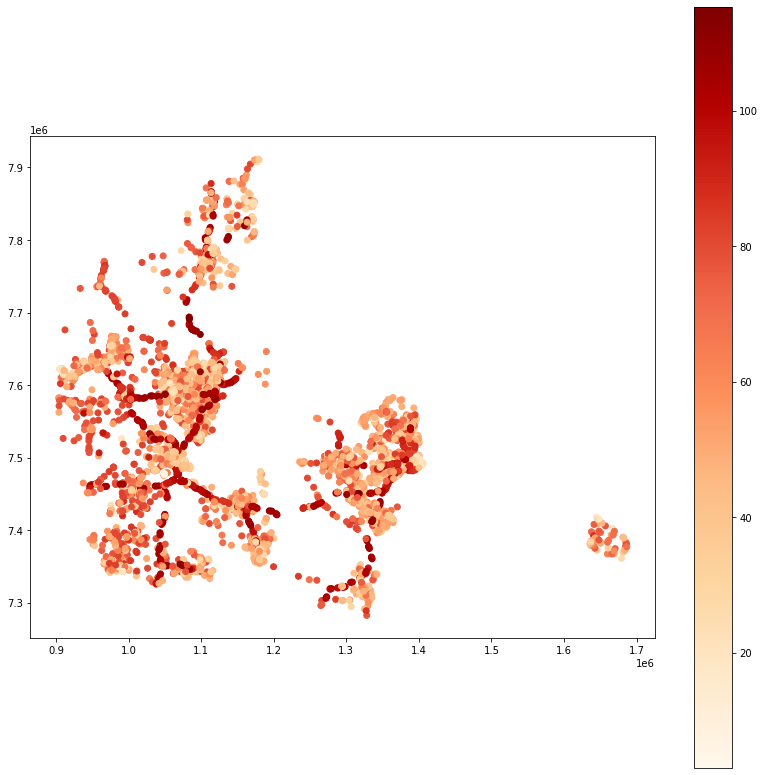

In [16]:
## check for støej
stoejdata.plot(column="GNSHAST071", figsize=(14,14), legend=True, cmap='OrRd')


## Spatial join

In [17]:
stoej_in_mun = gdp.sjoin(stoejdata, mun_psych, how="right", op='within')

In [20]:
stoej_in_mun.head()

,index_left,DATAEJER,VEJBESTYRE,VEJNR,VEJDEL,VEJNAVN,KILOMETER,METER,LOKATION,KOMMUNE,...,DQ_POSACPL,DQ_POSACLV,TIMEOF_CRE,TIMEOF_PUB,TIMEOF_REV,TIMEOF_EXP,omr,alt2016,psyk2016,psykratio
0,3483.0,580,580.0,5191035.0,1,Bytoften,0.0,95.0,Bovrup,580.0,...,1,None,2020-06-09,2020-06-09,None,2020-11-07,Aabenraa,7016.0,109.0,0.015536
0,106.0,580,580.0,5194079.0,0,Krusmøllevej,0.0,950.0,Krusmølle,580.0,...,1,None,2020-06-09,2020-06-09,None,2020-11-07,Aabenraa,7016.0,109.0,0.015536
0,5396.0,580,580.0,5197220.0,0,Strandgade,0.0,450.0,Krusmølle,580.0,...,1,None,2020-06-09,2020-06-09,None,2020-11-07,Aabenraa,7016.0,109.0,0.015536
0,103.0,580,580.0,5197220.0,0,Strandgade,0.0,125.0,Krusmølle,580.0,...,1,None,2020-06-09,2020-06-09,None,2020-11-07,Aabenraa,7016.0,109.0,0.015536
0,2729.0,580,580.0,500520.0,0,Flensborgvej,3.0,350.0,Styrtom,580.0,...,1,None,2020-06-09,2020-06-09,None,2020-11-07,Aabenraa,7016.0,109.0,0.015536


In [24]:
#how many measurements per municipality
print (stoej_in_mun.groupby('omr')['index_left'].nunique())

omr
Aabenraa           173
Aalborg            262
Aarhus              57
Albertslund         95
Allerød             68
                  ... 
Vejle              515
Vesthimmerlands      7
Viborg              48
Vordingborg         16
Ærø                  0
Name: index_left, Length: 98, dtype: int64


In [30]:
# Finding "Average noise"
stoej_in_mun['avg_noise'] = stoej_in_mun['GNSHAST071'].groupby(stoej_in_mun['omr']).transform('mean')

In [35]:
# Finding "median noise"
stoej_in_mun['med_noise'] = stoej_in_mun['GNSHAST071'].groupby(stoej_in_mun['omr']).transform('median')

In [44]:
#Finding "max noise"
stoej_in_mun['max_noise'] = stoej_in_mun['GNSHAST071'].groupby(stoej_in_mun['omr']).transform('max')

## Comparing the maps


This map shows the ratio of psychiatric hospitalizations:

Text(0.5, 1.0, 'Ratio of psychiatric hospitalizations to general population in each Danish municipality')

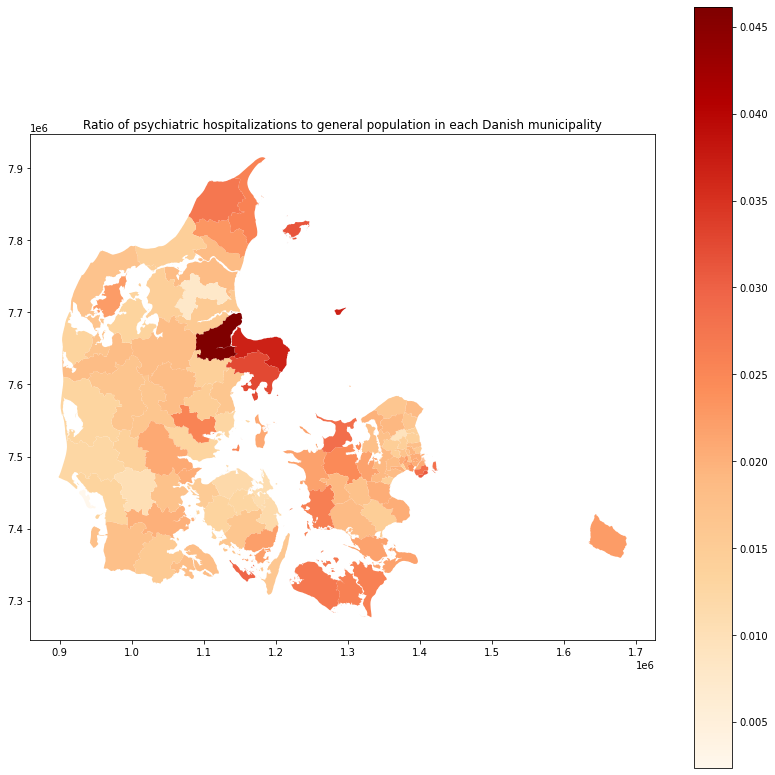

In [47]:
mun_psych.plot(column="psykratio", legend="True", figsize=(14,14), cmap='OrRd')
plt.title('Ratio of psychiatric hospitalizations to general population in each Danish municipality')

This map shows the average noise level (per noise measurement) in each municipality:

Text(0.5, 1.0, 'average noise level (DB per noise measurement) in each Danish municipality')

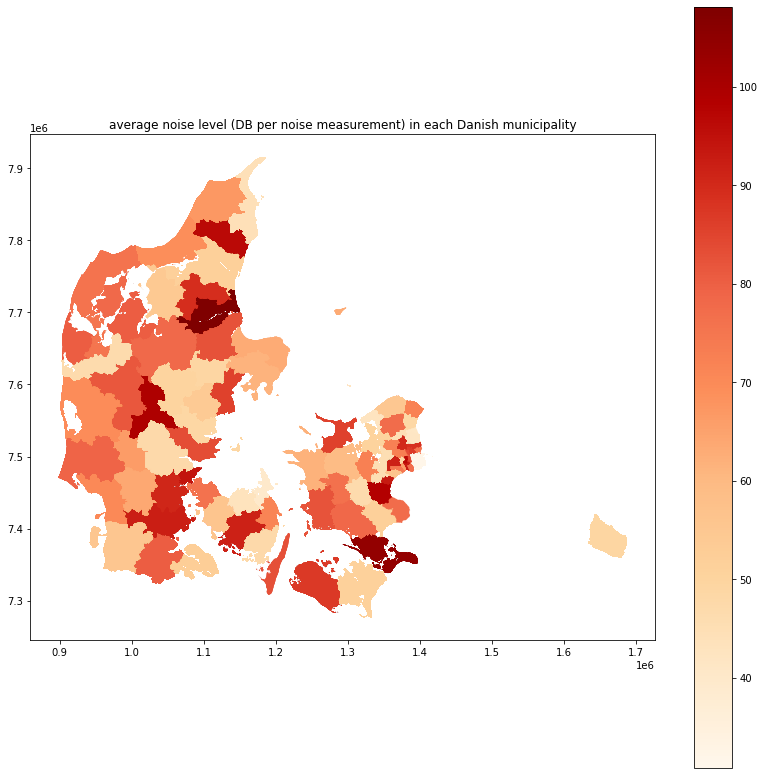

In [48]:
#plot of average noise per measurement
stoej_in_mun.plot(column="avg_noise", figsize=(14,14), legend=True, cmap='OrRd')
plt.title('Average noise level (DB per noise measurement) in each Danish municipality')

This map shows the median noise level (per noise measurement) in each municipality:

Text(0.5, 1.0, 'Median noise level (DB per noise measurement) in each Danish municipality')

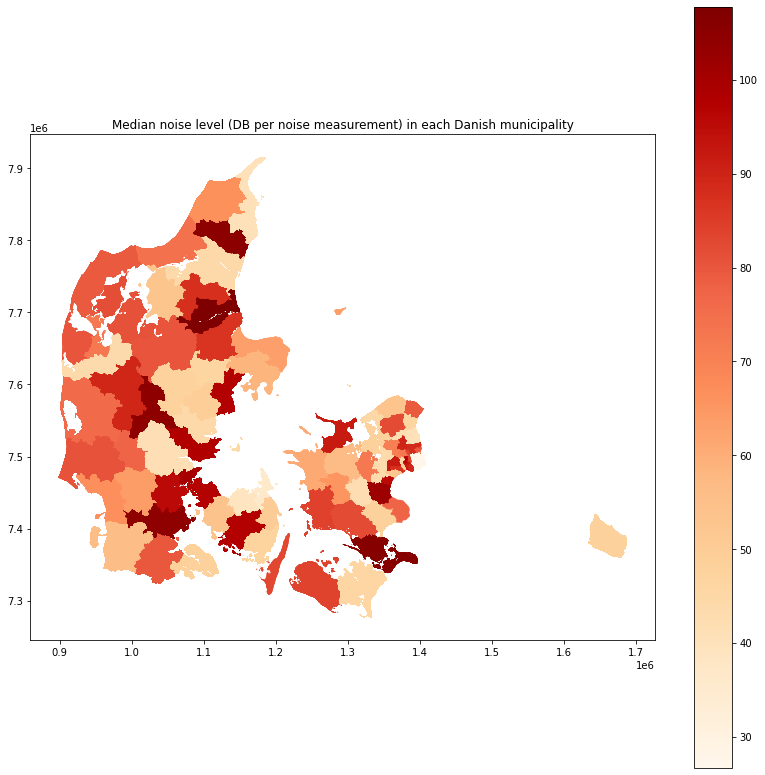

In [49]:
stoej_in_mun.plot(column="med_noise", figsize=(14,14), legend=True, cmap='OrRd')
plt.title('Median noise level (DB per noise measurement) in each Danish municipality')

This map shows the maximum noise level for (per noise measurement) in each municipality:

Text(0.5, 1.0, 'Maximum noise level (DB per noise measurement) in each Danish municipality')

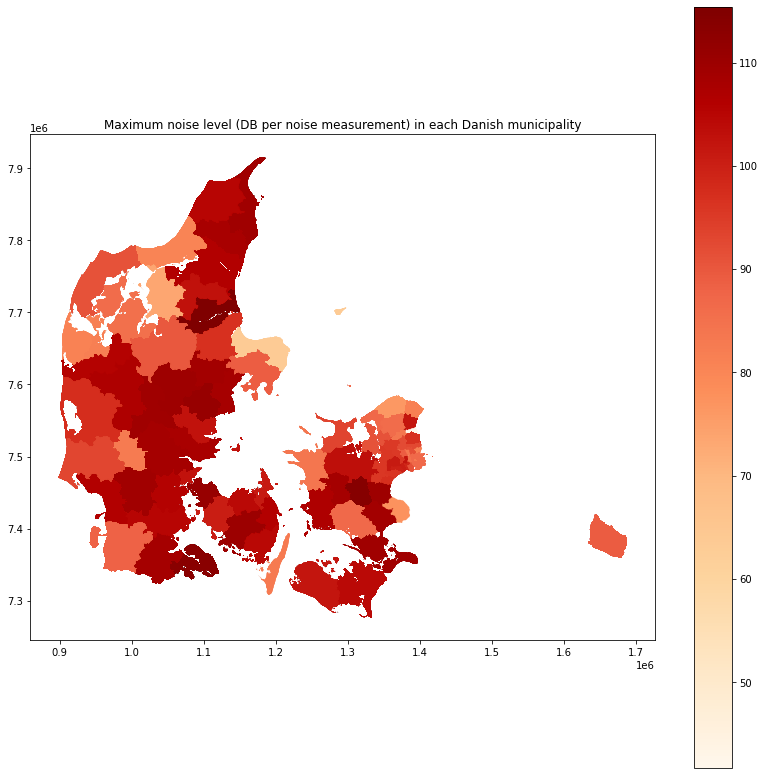

In [50]:
stoej_in_mun.plot(column="max_noise", figsize=(14,14), legend=True, cmap='OrRd')
plt.title('Maximum noise level (DB per noise measurement) in each Danish municipality')

**Conclusion**

From visual inspection there appears to be no connection between the noise levels (at any aggregate level) and the number of psychiatric hospitalizations in each municipality. However, looking at the map below we see that many municipalities, particularly rural ones, have few datapoints and that these are primarily located along major roads. 

<AxesSubplot:>

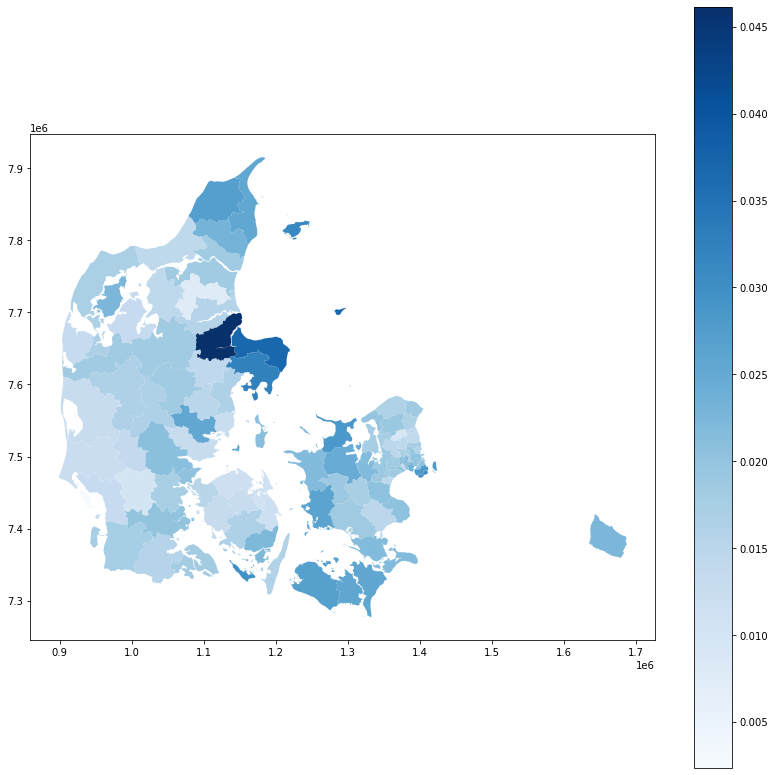

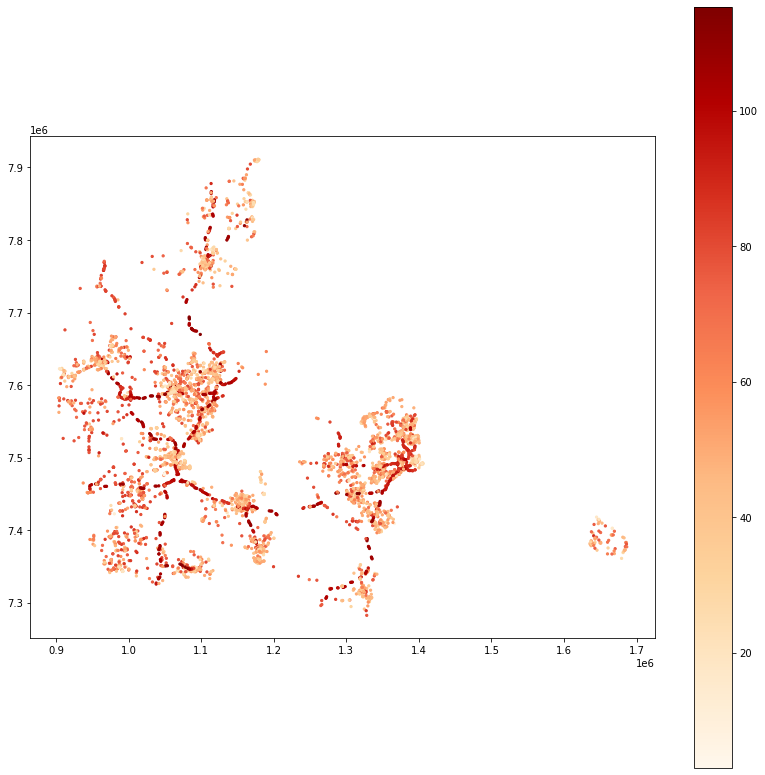

In [55]:
#for both
#plt.subplots(1,1, figsize=(14,14))
mun_psych.plot(column="psykratio", legend="True", cmap='Blues', figsize=(14,14))
stoejdata.plot(column="GNSHAST071", legend=True, cmap='OrRd', markersize=5, figsize=(14,14))